# Understanding Hired Rides in NYC

_[Project prompt](https://docs.google.com/document/d/1tGcX2qzS2GoaN5zFeD5DVJxqDmoQdmMs7QncZwFCEqU/edit#)_

_This scaffolding notebook may be used to help setup your final project. It's totally optional whether you make use of this or not._

_If you do use this notebook, everything provided is optional as well - you may remove or add prose and code as you wish._

_Anything in italics (prose) or comments (in code) is meant to provide you with guidance. **Remove the italic lines and provided comments** before submitting the project, if you choose to use this scaffolding. We don't need the guidance when grading._

_All code should be consider "pseudo-code" - not functional by itself, and only a suggestion at the approach._

## Requirements

_A checklist of requirements to keep you on track. Remove this whole cell before submitting the project._

* Code clarity: make sure the code conforms to:
    * [ ] [PEP 8](https://peps.python.org/pep-0008/) - You might find [this resource](https://realpython.com/python-pep8/) helpful as well as [this](https://github.com/dnanhkhoa/nb_black) or [this](https://jupyterlab-code-formatter.readthedocs.io/en/latest/) tool
    * [ ] [PEP 257](https://peps.python.org/pep-0257/)
    * [ ] Break each task down into logical functions
* The following files are submitted for the project (see the project's GDoc for more details):
    * [ ] `README.md`
    * [ ] `requirements.txt`
    * [ ] `.gitignore`
    * [ ] `schema.sql`
    * [ ] 6 query files (using the `.sql` extension), appropriately named for the purpose of the query
    * [x] Jupyter Notebook containing the project (this file!)
* [x] You can edit this cell and add a `x` inside the `[ ]` like this task to denote a completed task

## Project Setup

In [77]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sqlalchemy as db
import seaborn as sns

uber_csv = "uber_rides_sample.csv"
uber_df = pd.read_csv(uber_csv)
DATABASE_URL = "sqlite:///project.db"
DATABASE_SCHEMA_FILE = "schema.sql"
QUERY_DIRECTORY = "queries"


In [ ]:
# any constants you might need, for example:

TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# add other constants to refer to any local data, e.g. uber & weather
UBER_CSV = "uber_rides_sample.csv"

NEW_YORK_BOX_COORDS = ((40.560445, -74.242330), (40.908524, -73.717047))
JFK_BOX_COORDS= ((40.615506,-73.826022),(40.669280,-73.743984)) # Lat / Lng format , JFK airport coordinates
LGA_BOX_COORDS= ((40.766103,-73.892017),(40.773705,-73.856404)) # Lat / Lng format , Laguardia airport coordinates
EWR_BOX_COORDS= ((40.670081,-74.200241),(40.717049,-74.148753)) # Lat / Lng format , Newark airport coordinates

## Part 1: Data Preprocessing - constructing a CSV File for taxi data.

### Creating the csv file containing samples from the taxi data

In this part we are going to download and clean all taxi data to get a similar sample than the one we have for uber rides. 
<mark> Please note this part of the project was done prior to the realeasing of the project template by the Profesor, the next parts are closer in form to what is expected. </mark>
Moreover, considering the size of the data this part is not intended to be runned again after we have compiled the final_csv.csv file that we will be working on for the rest of the project.

In [160]:
###### please change the path at the very bottom
def export_taxi_csv(your_path):
        """Scrape the taxi data website, find all CSV links from 2009 to 2015 
        and export all the content to path of your choice
    
    Args:
        string (str): path you would like to store all the CSVs at
        
    """
# we care about data in the range of 01-2009 through 06-2015 
    content = requests.get('https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page')
    soup = BeautifulSoup(content.text, 'lxml')
    # all_a_tags = results_page.find_all('a')
    web_a_list = [a['href'] for a in soup.find_all('a')] # this will return all href links in the website

    # yellow_taxi_links will contain links of all the csv, but we only care about the years from 2009 to 2015
    yellow_taxi_links = []
    for i in web_a_list:
        if "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata" in i:
            yellow_taxi_links.append(i)

    # Code below will get us final_yellow_csv which contains the links of the csv from 2009 to 2015 only
    final_yellow_csv = []
    for i in yellow_taxi_links:
        if "2009" in i or "2010" in i or "2011" in i or "2012" in i or "2013" in i or "2014" in i or "2015" in i:
            final_yellow_csv.append(i)

    ## I try using regex but found it easier to use if statement instead
    # yellow_taxi_links_2009_2015 = []
    # pattern = r"2009"
    # pattern1 = r"201([0-5])"

    # match = re.match(pattern,yellow_taxi_links[130])

    os.makedirs(your_path, exist_ok=True)  

    taxi_data_list = []
    for i in range(len(final_yellow_csv)):
        if i >= 72:
            print(i)
            data = pd.read_csv(final_yellow_csv[i], on_bad_lines='skip')
            data = data.drop(['Rate_Code', 'store_and_forward','mta_tax'], axis=1)
            data = data.dropna() # remove rows containing na 
            data = data.sample(n=3000)
            data.to_csv(your_path+str(i)+'.csv') 
        else:
            data = pd.read_csv(final_yellow_csv[i], on_bad_lines='skip')
            data = data.dropna() # remove rows containing na 

            data = data.sample(n=3000)
            data.to_csv(your_path+str(i)+'.csv')  
            
path = input('please input your path')            
export_taxi_csv(path)
# example: /Users/h.s.a.li/Desktop/Taxi_CSV

    # skip on bad lines such blank row in some csv
    # if it is 2009 csv drop 'Rate_Code', 'store_and_forward','mta_tax' columns because they are empty
    # get rid of all rows with NA
    # sample 3000 rows from each csv

KeyboardInterrupt: Interrupted by user

In [ ]:
# changing all the column names from all dataset to the 2010 format
# why 2010? I think it looks the simplest
# add extra and mta_tax to the dataset that miss them
# do a append of to combine all sampled data into one single dataframe 

import glob

def clean_taxi_csv(your_path):
    """filter each taxi csv file, append them togeher  and export it to a 
    
    Args:
        string (str): path you would like to store the final csv
        
    """
    path = your_path
    csv_files = glob.glob(os.path.join(path, "*.csv"))

    ### please change this to your directory  
    df = pd.read_csv('/Users/h.s.a.li/Desktop/Taxi_CSV/60.csv')

    df = df.drop(['Unnamed: 0','vendor_id','rate_code','store_and_fwd_flag'],axis=1)
    final_columns = df.columns

    # print(final_columns)
    final_df = pd.DataFrame()

    for i in range(len(csv_files)):
        df = pd.read_csv(your_path+str(i)+'.csv')
        col_names = df.columns

        #2015-01
        if 'VendorID' in col_names and 'RateCodeID' in col_names:
            df = df.drop(['Unnamed: 0','VendorID','RateCodeID','store_and_fwd_flag'],axis=1)
            df.rename(columns = {'tpep_pickup_datetime':'pickup_datetime', 'tpep_dropoff_datetime':'dropoff_datetime','improvement_surcharge':'surcharge'}, inplace = True)
            final_df = final_df.append(df)

        #2015-07
        # changes: 'RatecodeID'
        elif 'VendorID' in col_names and 'RatecodeID' in col_names: # 6.csv
            df = df.drop(['Unnamed: 0','VendorID','RatecodeID','store_and_fwd_flag'],axis=1)
            df.rename(columns = {'tpep_pickup_datetime':'pickup_datetime', 'tpep_dropoff_datetime':'dropoff_datetime','improvement_surcharge':'surcharge'}, inplace = True)
            final_df = final_df.append(df)

        #2014
        # changes: ' rate_code',' store_and_fwd_flag'
        elif 'vendor_id' in col_names and ' rate_code' in col_names:
            df = df.drop(['Unnamed: 0','vendor_id',' rate_code',' store_and_fwd_flag'],axis=1)
            df.columns = df.columns.str.strip()
            df['extra'] = 0

            final_df = final_df.append(df)

        #2013
        # changes: 'rate_code','store_and_fwd_flag'
        elif 'vendor_id' in col_names and 'rate_code' in col_names:
            df = df.drop(['Unnamed: 0','vendor_id','rate_code','store_and_fwd_flag'],axis=1)
            df['extra'] = 0
            final_df = final_df.append(df)

        #2009
        else:
            df = df.drop(['Unnamed: 0','vendor_name'],axis=1)
            df.rename(columns = {'Trip_Pickup_DateTime':'pickup_datetime', 'Trip_Dropoff_DateTime':'dropoff_datetime','Passenger_Count':'passenger_count','Trip_Distance':'trip_distance','Start_Lon':'pickup_longitude','Start_Lat':'pickup_latitude','End_Lon':'dropoff_longitude','End_Lat':'dropoff_latitude','Payment_Type':'payment_type','Fare_Amt':'fare_amount','Tip_Amt':'tip_amount','Tolls_Amt':'tolls_amount','Total_Amt':'total_amount'}, inplace = True)
            df['mta_tax'] = 0
            df['extra'] = 0
            final_df = final_df.append(df)

    ### please change this to your directory   
    final_df.to_csv(your_path) 
    #'/Users/h.s.a.li/Desktop/final_csv.csv'

path = input('please input your path')
clean_taxi_csv(path)

Because of runtime we did not combine functions that where getting the taxi data and that were cleaning the taxi data. 

<mark> The above code created a file from web scrapping called "final_csv.csv" that is attached to our project. The next functions can be runned using that file </mark>

## Part 1: Data Preprocessing - creating dataframes and cleaning data.

<mark> If you want to run our functions you can start from the next cell if you use final_csv.csv . To allow this we do a second project setup here </mark>

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sqlalchemy as db
import seaborn as sns

uber_csv = "uber_rides_sample.csv"
uber_df = pd.read_csv(uber_csv)
DATABASE_URL = "sqlite:///project.db"
DATABASE_SCHEMA_FILE = "schema.sql"
QUERY_DIRECTORY = "queries"


In [24]:
# any constants you might need, for example:

TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# add other constants to refer to any local data, e.g. uber & weather
UBER_CSV = "uber_rides_sample.csv"

NEW_YORK_BOX_COORDS = ((40.560445, -74.242330), (40.908524, -73.717047))
JFK_BOX_COORDS= ((40.615506,-73.826022),(40.669280,-73.743984)) # Lat / Lng format , JFK airport coordinates
LGA_BOX_COORDS= ((40.766103,-73.892017),(40.773705,-73.856404)) # Lat / Lng format , Laguardia airport coordinates
EWR_BOX_COORDS= ((40.670081,-74.200241),(40.717049,-74.148753)) # Lat / Lng format , Newark airport coordinates


### Filtering taxi data based on coordinates
We are now filtering on coordinates to keep only taxi rides in new york, we are also cleaning the data by removing columns that we are going to be using in the rest of the project

In [32]:
def cleaning_taxi_data(df):
    """
    Clean the taxi data by further removing unneccessary rows that 
    we did not consider in the clean_taxi_csv function, which is our 
    first step of cleaning taxi dataframe
    
    Args:
        dataframe (df): taxi dataframe
        
    Returns:
        dataframe: 'cleaner' taxi dataframe
    """
    df = df.drop(columns=["Unnamed: 0","payment_type",
        "fare_amount",'tolls_amount','mta_tax','surcharge','extra','trip_distance','passenger_count'], errors="ignore")
    df = df[df.pickup_latitude <= NEW_YORK_BOX_COORDS[1][0]]
    df = df[df.dropoff_latitude <= NEW_YORK_BOX_COORDS[1][0]]
    df = df[df.pickup_latitude > NEW_YORK_BOX_COORDS[0][0]]
    df = df[df.dropoff_latitude > NEW_YORK_BOX_COORDS[0][0]]
    df = df[df.pickup_longitude <= NEW_YORK_BOX_COORDS[1][1]]
    df = df[df.dropoff_longitude <= NEW_YORK_BOX_COORDS[1][1]]
    df = df[df.pickup_longitude > NEW_YORK_BOX_COORDS[0][1]]
    df = df[df.dropoff_latitude > NEW_YORK_BOX_COORDS[0][1]]
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
    df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"], format="%Y-%m-%d %H:%M:%S")
    return df

### Calculating distance
In this part we define all the distance functions that we will need later for data analysis. We use distance formulas from this website: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula

In [34]:
def calculate_distance(startCoord, endCoord):
    """
    Calculate distance from two coordinates
    
    Args:
        interger (int): integers of the coordinates taken from the row of the dataframe 
        
    Returns:
        dataframe: distance of each row
    """
    R = 6371
    startLat = math.radians(startCoord[0])
    startLong = math.radians(startCoord[1])
    endLat = math.radians(endCoord[0])
    endLong = math.radians(endCoord[1])

    dLong = endLong - startLong
    dLat = endLat - startLat

    a = (math.sin(dLat/2) * math.sin(dLat/2)+ math.cos(startLat) * math.cos(endLat) * math.sin(dLong/2) * math.sin(dLong/2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

def add_distance_column(df):    
    """add distance column to the dataframe of interest
    
    Args:
        dataframe: either the taxi or uber data
        
    Returns:
        dataframe: dataframe with distance
    """
    from_coords = list(zip(df.pickup_latitude, df.pickup_longitude))
    to_coords = list(zip(df.dropoff_latitude, df.dropoff_longitude))
    
    distance_list = []
    for i in range(len(from_coords)):
        distance = calculate_distance(from_coords[i], to_coords[i])
        distance_list.append(distance)
    df["distance"] = distance_list
    return df

### Final Processing for Taxi Data.

Final function we can call to build a clean and processed taxi dataframe from a sampled csv of taxi rides.

In [35]:
def get_clean_and_process_taxi_data():
    """load and clean the  taxi data and add distance column
    
    Args:
        string (str): path you would like to store all the CSVs at
        
    Returns:
        dataframe: clean taxi dataframe
    """
    taxi_df=pd.read_csv("final_csv.csv")
    taxi_df=cleaning_taxi_data(taxi_df)
    taxi_df=add_distance_column(taxi_df)
    return taxi_df

### Processing Uber Data

In the next few cells we fine the functions that we will call to create the cleaned and processed dataframe of uber rides

In [40]:
uberCSV="./uber_rides_sample.csv"

def load_and_clean_uber_data(csv_file):
    """
    load and clean the uber data from Uber CSV file
    
    Args:
        csv: path of the uber data
        
    Returns:
        dataframe: clean uber dataframe
         
    """
    df = pd.read_csv(csv_file)
    df.drop(columns=["Unnamed: 0","key"], inplace=True)
    
    df = df[df.pickup_latitude <= NEW_YORK_BOX_COORDS[1][0]]
    df = df[df.dropoff_latitude <= NEW_YORK_BOX_COORDS[1][0]]
    df = df[df.pickup_latitude > NEW_YORK_BOX_COORDS[0][0]]
    df = df[df.dropoff_latitude > NEW_YORK_BOX_COORDS[0][0]]

    df = df[df.pickup_longitude <= NEW_YORK_BOX_COORDS[1][1]]
    df = df[df.dropoff_longitude <= NEW_YORK_BOX_COORDS[1][1]]
    df = df[df.pickup_longitude > NEW_YORK_BOX_COORDS[0][1]]
    df = df[df.dropoff_latitude > NEW_YORK_BOX_COORDS[0][1]]
    
    df = df[df.passenger_count > 0]
    df.drop(columns=["passenger_count"], inplace=True)
    
    df["pickup_datetime"] = pd.to_datetime(
        df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S UTC"
    )
    
    df = df.rename(columns={"fare_amount": "total_amount"})
    
    return df 

def get_uber_data():
    """get uber data
        
    Returns:
        dataframe: uber dataframe
         
    """
    uberDf = load_and_clean_uber_data(uberCSV)
    add_distance_column(uberDf)
    return uberDf

### Processing Weather Data

In this part we are processing the weather data 

In [41]:
def clean_month_weather_data_hourly(data):
    """Clean the hourly weather data 
    
    Args:
        dataframe: dataframe of hourly weather data
        
    Returns:
        dataframe: clean hourly weather dataframe
         
    """
    data_hourly=data[['DATE','HourlyWindSpeed','HourlyPrecipitation']]
    data_hourly.rename(columns={'DATE': "Date", "HourlyWindSpeed": "Wind_speed", "HourlyPrecipitation": "Precipitation"},inplace=True)
    data_hourly["Date"] = pd.to_datetime(data_hourly["Date"], format="%Y-%m-%dT%H:%M:%S")
    data_hourly["Precipitation"] = pd.to_numeric(data_hourly["Precipitation"], errors="coerce")
    data_hourly.dropna(subset=["Wind_speed"], inplace=True)
    return data_hourly
    
    
def clean_month_weather_data_daily(data):
    """Clean the monthly weather data 
    
    Args:
        dataframe: dataframe of monthly weather data
        
    Returns:
        dataframe: clean monthly weather dataframe
        
    """ 
    data_daily=data[['DATE','DailyAverageWindSpeed']]
    data_daily.rename(columns={'DATE': "Date", "DailyAverageWindSpeed": "Wind_speed"},inplace=True)
    data_daily["Date"] = pd.to_datetime(data_daily["Date"], format="%Y-%m-%dT%H:%M:%S")
    data_daily["Wind_speed"] = pd.to_numeric(data_daily["Wind_speed"], errors="coerce")
    data_daily.dropna(subset=["Wind_speed"], inplace=True)
    return data_daily
    

def load_and_clean_weather_data():
    """Load and clean the weather data 
        
    Returns:
        dataframe: weather dataframes filtered by years
         
    """    
    hourly_dataframes = []
    daily_dataframes = []
    years=["2009","2010","2011","2012","2013","2014","2015"] # to answer questions from part 3 we only need data from this two years.
    list_df=[]
    for year in years:
        filename="%s_weather.csv" % (str(year))
        data=pd.read_csv(filename)
        list_df.append(data)
    data=pd.concat(list_df,ignore_index=True)
    hourly_data = clean_month_weather_data_hourly(data)
    daily_data = clean_month_weather_data_daily(data)
    return hourly_data, daily_data

### Process All Data

Here all the previous functions that we are defined are called to created the four final dataframes that we are gonna use to populate our databases


In [47]:
taxi_data = get_clean_and_process_taxi_data()
uber_data = get_uber_data()
hourly_weather, daily_weather = load_and_clean_weather_data()

C:\Users\arnau\AppData\Local\Temp\ipykernel_27312\85067391.py:1: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  taxi_data = get_clean_and_process_taxi_data()
C:\Users\arnau\AppData\Local\Temp\ipykernel_27312\85067391.py:3: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  hourly_weather, daily_weather = load_and_clean_weather_data()
C:\Users\arnau\AppData\Local\Temp\ipykernel_27312\85067391.py:3: DtypeWarning: Columns (8,9,10,17) have mixed types.Specify dtype option on import or set low_memory=False.
  hourly_weather, daily_weather = load_and_clean_weather_data()
C:\Users\arnau\AppData\Local\Temp\ipykernel_27312\85067391.py:3: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  hourly_weather, daily_weather = load_and_clean_weather_data()
C:\Users\arnau\AppData\Local\Temp\ipykernel_27312\85067391.py:3: DtypeWarning: Columns (7,8,

In [48]:
uber_data

,total_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1.683323
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,2.457590
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,5.036377
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,1.661683
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,4.475450
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,0.112210
199996,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1.875050
199997,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,12.850319
199998,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,3.539715


In [49]:
taxi_data

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_amount,total_amount,distance
0,2015-01-12 19:55:41,2015-01-12 20:00:12,-73.960052,40.773651,-73.954689,40.787605,0.00,7.80,1.616014
1,2015-01-19 16:03:09,2015-01-19 16:30:12,-73.993454,40.751938,-73.959129,40.709087,4.86,29.16,5.573878
2,2015-01-06 00:20:40,2015-01-06 00:45:44,-74.000008,40.730648,-73.953262,40.634659,6.15,36.95,11.378085
3,2015-01-27 18:23:24,2015-01-27 18:31:04,-73.983124,40.759251,-73.963188,40.771111,0.00,9.30,2.134940
4,2015-01-16 19:39:58,2015-01-16 19:55:13,-73.976830,40.743610,-74.000648,40.747334,0.00,12.80,2.048847
...,...,...,...,...,...,...,...,...,...
251995,2009-12-22 17:47:00,2009-12-22 18:13:00,-73.974413,40.737962,-73.970440,40.757633,0.00,14.00,2.212773
251996,2009-12-17 16:57:24,2009-12-17 17:06:36,-73.964066,40.771085,-73.964870,40.763823,0.00,7.60,0.810331
251997,2009-12-14 15:07:00,2009-12-14 15:27:00,-73.998565,40.733537,-73.981293,40.771050,2.00,14.60,4.417703
251998,2009-12-25 15:44:00,2009-12-25 16:01:00,-74.004050,40.716750,-73.992430,40.745353,0.00,12.60,3.327808


In [50]:
hourly_weather

,Date,Wind_speed,Precipitation
0,2009-01-01 00:51:00,18.0,NaN
1,2009-01-01 01:51:00,18.0,NaN
2,2009-01-01 02:51:00,18.0,NaN
3,2009-01-01 03:51:00,8.0,NaN
4,2009-01-01 04:51:00,11.0,NaN
...,...,...,...
77964,2015-12-31 18:51:00,3.0,0.0
77965,2015-12-31 19:51:00,6.0,0.0
77966,2015-12-31 20:51:00,10.0,0.0
77968,2015-12-31 22:51:00,7.0,0.0


In [51]:
daily_weather

,Date,Wind_speed
38717,2012-07-31 23:59:00,3.8
38771,2012-08-01 23:59:00,2.3
38797,2012-08-02 23:59:00,2.7
38823,2012-08-03 23:59:00,3.5
38856,2012-08-04 23:59:00,3.1
...,...,...
77823,2015-12-27 23:59:00,5.7
77849,2015-12-28 23:59:00,8.3
77897,2015-12-29 23:59:00,7.0
77936,2015-12-30 23:59:00,4.1


## Part 2: Storing Cleaned Data

We are going to populate a database using the dataframes that we built.

In [52]:
# This allow us to run the code again (cmd prompt on windows)
!del project.db
!del schema.sql

In [53]:
engine = db.create_engine(DATABASE_URL)

In [54]:
# if using SQL (as opposed to SQLAlchemy), define the commands 
# to create your 4 tables/dataframes
HOURLY_WEATHER_SCHEMA = """
CREATE TABLE hourly_weather (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATETIME,
    Precipitation FLOAT,
    Wind_speed FLOAT
);
"""

DAILY_WEATHER_SCHEMA = """
CREATE TABLE daily_weather(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Date DATETIME,
    Wind_speed FLOAT
);
"""

TAXI_TRIPS_SCHEMA = """
CREATE TABLE taxi_trips (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    pickup_datetime DATETIME,
    dropoff_datetime DATETIME,
    pickup_longitude FLOAT,
    pickup_latitude FLOAT,
    dropoff_longitude FLOAT,
    dropoff_latitude FLOAT,
    tip_amount FLOAT,
    total_amount FLOAT,
    distance FLOAT
);
"""

UBER_TRIPS_SCHEMA = """
CREATE TABLE uber_trips (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    total_amount FLOAT,
    pickup_datetime DATETIME,
    pickup_longitude FLOAT,
    pickup_latitude FLOAT,
    dropoff_longitude FLOAT,
    dropoff_latitude FLOAT,
    distance FLOAT
);
"""

In [55]:
# create that required schema.sql file
with open(DATABASE_SCHEMA_FILE, "w") as f:
    f.write(HOURLY_WEATHER_SCHEMA)
    f.write(DAILY_WEATHER_SCHEMA)
    f.write(TAXI_TRIPS_SCHEMA)
    f.write(UBER_TRIPS_SCHEMA)

In [56]:
# create the tables with the schema files
with engine.connect() as connection:
    rs = connection.execute(DAILY_WEATHER_SCHEMA)
    rs = connection.execute(HOURLY_WEATHER_SCHEMA)
    rs = connection.execute(TAXI_TRIPS_SCHEMA)
    rs = connection.execute(UBER_TRIPS_SCHEMA)

### Add Data to Database

_Write some prose that tells the reader what you're about to do here._

In [58]:
def dataframes_to_table(table_name_to_dataframe,engine): 
    """
   Transform a dataframe into a table
            Parameters:
                      table_name_to_dataframe: dictionnary
                      engine : sql alchemy engine
            Returns:
                   Nothing, dataframe will be populated.
    """
    for table_name, df in table_name_to_dataframe.items():
        df.to_sql(table_name, con=engine, if_exists="append", index=False)

In [59]:
table_name_to_dataframe = {
    "taxi_trips": taxi_data,
    "uber_trips": uber_data,
    "hourly_weather": hourly_weather,
    "daily_weather": daily_weather
}

dataframes_to_table(table_name_to_dataframe,engine)

## Part 3: Understanding the Data

In this Part we write queries to our newly created database, and create a SQL file corresponding to each query.

In [60]:
def write_query_to_file(query: str, outfile: str ):
    '''
    Write an SQL query into a newly created file
            Parameters:
                    query (str): a string corresponding to the SQL query
                    b (str): another string corresponding to file name
            Returns:
                   Nothing, a file will be created.
    '''
    with open(outfile,"w") as f:
        f.write(query)

### Query 1

We are gonna compute: For 01-2009 through 06-2015, what hour of the day was the most popular to take a yellow taxi? The result should have 24 bins.

In [61]:
### Query info### 
QUERY_1 = """
SELECT
    COUNT(pickup_datetime),
    strftime ('%H', pickup_datetime) hour
FROM taxi_trips
GROUP BY strftime ('%H', pickup_datetime)
"""
QUERY_1_OUTFILE = f"1_popular_hour_taxis.sql"

In [62]:
### Saving query to file ### 
write_query_to_file(QUERY_1,QUERY_1_OUTFILE)

In [63]:
### excuting query ###
query1=engine.execute(QUERY_1).fetchall()
query1

[(9957, '00'),
 (7405, '01'),
 (5607, '02'),
 (4109, '03'),
 (3075, '04'),
 (2674, '05'),
 (5321, '06'),
 (9161, '07'),
 (11326, '08'),
 (11504, '09'),
 (11115, '10'),
 (11402, '11'),
 (12022, '12'),
 (12100, '13'),
 (12517, '14'),
 (11801, '15'),
 (9874, '16'),
 (11864, '17'),
 (14571, '18'),
 (15216, '19'),
 (14402, '20'),
 (14179, '21'),
 (13691, '22'),
 (12132, '23')]

### Query 2

We are computing which day of the week are most popular to take an uber during this time period: For 01-2009 through 06-2015

In [64]:
QUERY_2 = """
SELECT
    COUNT(pickup_datetime),
    strftime ('%w', pickup_datetime) weekday
FROM taxi_trips
GROUP BY strftime ('%w', pickup_datetime)
"""
QUERY_2_OUTFILE = f"2_popular_days_ubers.sql"

write_query_to_file(QUERY_2,QUERY_2_OUTFILE)

In [65]:
engine.execute(QUERY_2).fetchall()

[(33064, '0'),
 (31830, '1'),
 (34362, '2'),
 (35869, '3'),
 (36568, '4'),
 (37782, '5'),
 (37550, '6')]

### Query 3

We are looking for the 95% percentile of distance traveled for all hired trips during July 2013.

In [66]:
QUERY_3 = """
WITH dist AS (
    SELECT distance FROM taxi_trips WHERE strftime ('%Y',pickup_datetime)=='2013' AND strftime ('%m',pickup_datetime)=='07'
    UNION ALL 
    SELECT distance from uber_trips WHERE strftime ('%Y',pickup_datetime)=='2013' AND strftime ('%m',pickup_datetime)=='07' )
SELECT distance
FROM dist
ORDER BY distance ASC
LIMIT 1
OFFSET (SELECT COUNT(*) FROM dist )*95/100-1
"""
QUERY_3_OUTFILE = f"3_95_distatnce_july.sql"

write_query_to_file(QUERY_3,QUERY_3_OUTFILE)



In [67]:
engine.execute(QUERY_3).fetchall()

[(9.911436206499419,)]

### Query 4

What were the top 10 days with the highest number of hired rides for 2009, and what was the average distance for each day?

In [68]:
QUERY_4 = """
WITH trips AS (
    SELECT pickup_datetime,distance FROM taxi_trips WHERE strftime ('%Y',pickup_datetime)=='2009' 
    UNION ALL 
    SELECT pickup_datetime,distance FROM uber_trips WHERE strftime ('%Y',pickup_datetime)=='2009' )
SELECT strftime('%Y-%m-%d', pickup_datetime) day_of_year,
        COUNT(pickup_datetime) total_trips,
        AVG(distance) avg_distance
FROM trips
GROUP BY day_of_year
ORDER BY total_trips DESC
LIMIT 10
"""
QUERY_4_OUTFILE = f"4_10_days_2009_highest_number_rides_avg_dist.sql"

write_query_to_file(QUERY_4,QUERY_4_OUTFILE)


In [69]:
engine.execute(QUERY_4).fetchall()

[('2009-08-14', 244, 3.2334614144173464),
 ('2009-04-18', 235, 3.368568791389203),
 ('2009-07-23', 233, 3.616767652331063),
 ('2009-12-11', 232, 2.910283871536076),
 ('2009-12-05', 227, 2.729197140778201),
 ('2009-11-06', 226, 3.6776905278330516),
 ('2009-02-18', 225, 2.9039385751349096),
 ('2009-12-18', 224, 2.86329487887885),
 ('2009-11-07', 222, 2.9978410850294024),
 ('2009-09-12', 222, 2.9943547313822525)]

### Query 5

Which 10 days in 2014 were the windiest, and how many hired trips were made on those days?

In [70]:
QUERY_5 = """
WITH trips AS (
    SELECT pickup_datetime FROM taxi_trips WHERE strftime ('%Y',pickup_datetime)=='2014' 
    UNION ALL 
    SELECT pickup_datetime FROM uber_trips WHERE strftime ('%Y',pickup_datetime)=='2014' )
SELECT strftime('%Y-%m-%d', trips.pickup_datetime) day_of_year,
        COUNT(trips.pickup_datetime) total_trips,
        daily_weather.wind_speed wind
FROM trips JOIN daily_weather ON strftime('%Y-%m-%d',trips.pickup_datetime)=strftime('%Y-%m-%d',daily_weather.Date)
GROUP BY day_of_year
ORDER BY wind DESC
LIMIT 10
"""
QUERY_5_OUTFILE = f"5_10_days_2014_windiest.sql"

write_query_to_file(QUERY_5,QUERY_5_OUTFILE)

In [71]:
engine.execute(QUERY_5).fetchall()

[('2014-03-13', 202, 14.1),
 ('2014-01-07', 183, 13.1),
 ('2014-02-13', 122, 12.6),
 ('2014-01-02', 141, 12.2),
 ('2014-03-26', 196, 11.9),
 ('2014-12-07', 168, 11.8),
 ('2014-12-08', 183, 11.5),
 ('2014-11-02', 185, 10.8),
 ('2014-03-29', 227, 10.8),
 ('2014-02-14', 169, 10.4)]

### Query 6

During Hurricane Sandy in NYC (Oct 29-30, 2012) and the week leading up to it, how many trips were taken each hour, and for each hour, how much precipitation did NYC receive and what was the sustained wind speed?

In [72]:
QUERY_6 = """
WITH trips AS (
    SELECT pickup_datetime FROM taxi_trips WHERE strftime('%Y-%m-%d',pickup_datetime)=='2012-10-29' 
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-30'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-28'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-27'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-26'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-25'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-24'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-23'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-22'
    UNION ALL 
    SELECT pickup_datetime FROM uber_trips WHERE strftime('%Y-%m-%d',pickup_datetime)=='2012-10-29' 
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-30'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-28'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-27'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-26'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-25'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-24'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-23'
      OR strftime('%Y-%m-%d', pickup_datetime)=='2012-10-22')
SELECT strftime('%Y-%m-%d-%H', trips.pickup_datetime) hour_of_day,
        COUNT(trips.pickup_datetime) total_trips,
        hourly_weather.Precipitation,
        hourly_weather.Wind_speed
FROM trips JOIN hourly_weather ON trips.pickup_datetime=hourly_weather.Date
GROUP BY hour_of_day
"""
QUERY_6_OUTFILE = f"6_Hurricane_hourly_2014_windiest.sql"

write_query_to_file(QUERY_6,QUERY_6_OUTFILE)

In [73]:
engine.execute(QUERY_6).fetchall()

[('2012-10-25-00', 1, 0.0, 3.0),
 ('2012-10-27-10', 1, 0.0, 9.0),
 ('2012-10-28-11', 1, 0.0, 8.0)]

## Part 4: Visualizing the Data

In this part we build multiple visualization of the data.

### Visualization 1

Creating an appropriate visualization for the first query/question in part 3: number of taxi trips per hour of day.

In [74]:
# use a more descriptive name for your function
def Visual_1_taxi_per_hour_of_day():
    """
    Plot the number of taxi trips per hour of day
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
    """
    data=engine.execute(QUERY_1).fetchall()
    hours_of_day=[]
    number_of_trips=[]
    for elem in data:
        hours_of_day.append(elem[1])
        number_of_trips.append(elem[0])
    plt.bar(hours_of_day,number_of_trips)
    plt.title("Number of taxi trips per hour of day from 01-2009 to 06-2015")
    plt.show()


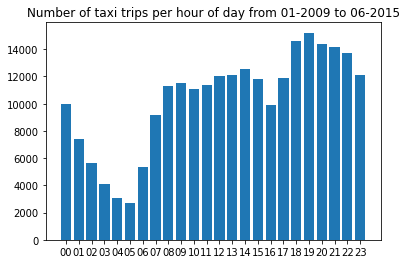

In [75]:
Visual_1_taxi_per_hour_of_day()

### Visualization 2

Creating a visualization that shows the average distance traveled per month (regardless of year - so group by each month). Include the 90% confidence interval around the mean in the visualization

In [76]:
def Visual_2_Avg_distance_per_month(taxi_data: pd.DataFrame(),uber_data: pd.DataFrame()):
    """
    Plot the number of taxi trips per hour of day
            Parameters:
                      taxi_data (DataFrame): The dataframe of taxi trip data.
                      uber_date (Dataframe): The dataframe of uber trips data.
            Returns:
                   Nothing, a graph will be displayed
    """
    taxi_data['mm'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.month
    uber_data['mm'] = pd.to_datetime(uber_data['pickup_datetime']).dt.month
    taxi_data['yyyy'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.year
    uber_data['yyyy'] = pd.to_datetime(uber_data['pickup_datetime']).dt.year
    distance_month_taxi=taxi_data[["distance","mm",'yyyy']]
    distance_month_uber=uber_data[["distance","mm",'yyyy']]
    distance_month=pd.concat([distance_month_taxi,distance_month_uber],ignore_index=True)
    grouped_distance_month=distance_month.groupby([distance_month['yyyy'],distance_month["mm"]]).sum()
    values=[]
    for i in range(12):
        values.append([])
    i=1
    for value in grouped_distance_month["distance"]:
        values[i%12-1].append(value)
        i+=1
    plot_info=[]
    for i in range(3):
        plot_info.append([])
    for month in values:
        plot_info[0].append(np.mean(month))
        plot_info[1].append(len(month))
        plot_info[2].append(np.std(month))
    means=plot_info[0]
    ci_90=[]
    for i in range(12):
        ci_90.append(1.64*plot_info[2][i]/math.sqrt(plot_info[1][i]))
    means=np.array(means)
    ci_90=np.array(ci_90)
    fig, ax = plt.subplots()
    ax.plot(np.unique(taxi_data['mm']),means)
    ax.fill_between(np.unique(taxi_data['mm']),(means-ci_90),(means+ci_90), color='b', alpha=.1)
    ax.set_title("Average Distance traveled per month with 90% confidence interval")
    plt.show()
        
        
    

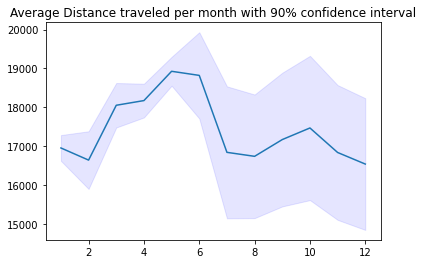

In [77]:
Visual_2_Avg_distance_per_month(taxi_data,uber_data)

### Visualization 3

Defining three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR (you can use bboxfinder to help).We are going to create a visualization that compares what day of the week was most popular for drop offs for each airport

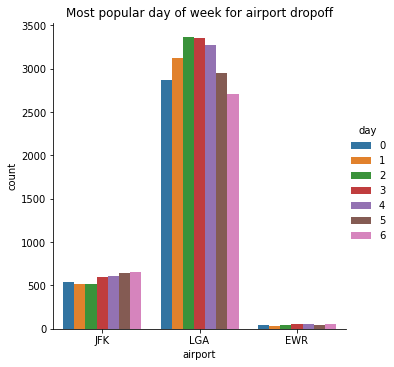

In [78]:
def cleaning_keeping_only_data_for_coord(df: pd.DataFrame() ,coord: tuple ,air_portname : str) -> pd.DataFrame():
    """
    Subfuction, filters a dataframe based on coordinated of a box
            Parameters:
                      df (DataFrame): The dataframe you want to filter.
                      coord (tuple): A tuple containing Lat/Long coordinated of the box
                      air_portname (string): Name of the airport corresponding to coordinates
            Returns:
                    df (DataFrame): a dataframe of trips where drips that did not dropoff in the airport gave been removed
    """
    df = df[df.dropoff_latitude <= coord[1][0]]
    df = df[df.dropoff_latitude > coord[0][0]]
    df = df[df.dropoff_longitude <= coord[1][1]]
    df = df[df.dropoff_latitude > coord[0][1]]
    df["airport"]=air_portname
    return df

def Visual_3_airport_dropoffs(taxi_data,uber_data):
    """
    Plot the number of taxi dropff per day of the week for each Ny airport.
            Parameters:
                      taxi_data (DataFrame): The dataframe of taxi trip data.
                      uber_date (Dataframe): The dataframe of uber trips data.
            Returns:
                   Nothing, a graph will be displayed
    """
    JFK_data=cleaning_keeping_only_data_for_coord(taxi_data,JFK_BOX_COORDS,"JFK")
    LGA_data=cleaning_keeping_only_data_for_coord(taxi_data,LGA_BOX_COORDS,"LGA")
    EWR_data=cleaning_keeping_only_data_for_coord(taxi_data,EWR_BOX_COORDS,"EWR")
    airport_data=pd.concat([JFK_data,LGA_data,EWR_data],ignore_index=True)
    airport_data["day"]=airport_data["pickup_datetime"].dt.dayofweek
    airport_data=airport_data[["day","airport",'pickup_datetime']]
    sns.catplot(data=airport_data,kind='count',x='airport',hue='day').set(title="Most popular day of week for airport dropoff")
    return

Visual_3_airport_dropoffs(taxi_data,uber_data)

### Visualization 4  

We are creating a heatmap of all hired trips over a map of the area. 
This was not implemented sorry.

### Visualization 5

We are creating a scatter plot that compares tip amount versus distance.

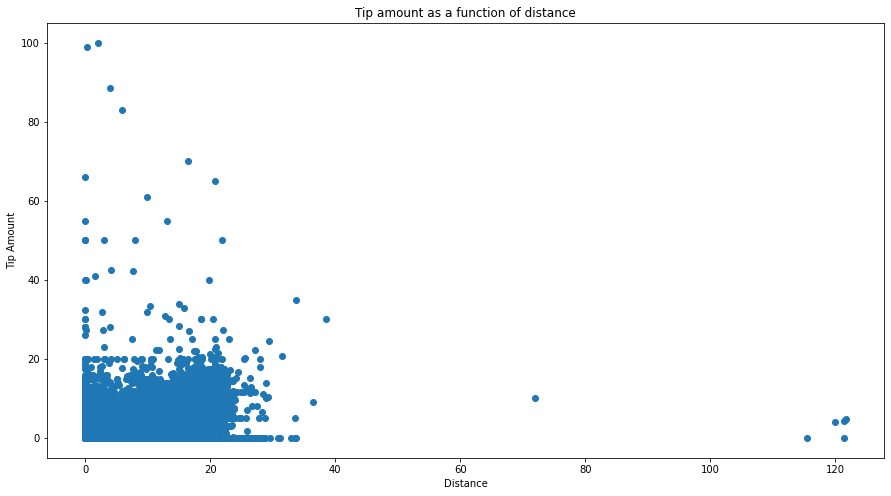

In [79]:
def Visual_5_tips_function_distance():
    """
    Plot the a scatter plot comparing tips and distance
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
   """
    Query="""
SELECT taxi_trips.tip_amount tip,
        taxi_trips.distance
FROM taxi_trips
ORDER BY tip DESC
"""
    data=engine.execute(Query).fetchall()
    tips=[]
    distance=[]
    for elem in data:
        tips.append(elem[0])
        distance.append(elem[1])
    fig, ax = plt.subplots(1,figsize=(15,8))
    ax.scatter(distance,tips)
    ax.set_title("Tip amount as a function of distance")
    ax.set_xlabel("Distance")
    ax.set_ylabel("Tip Amount")
    plt.show()
    return 

Visual_5_tips_function_distance()

### Visualization 6

We are creating a scatter plot that compares tip amount versus precipitation.

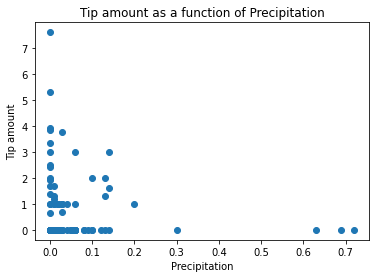

In [80]:
def Visual_6_tips_as_function_precipitation():
    """
    Plot the a scatter plot comparing tips and precipitation
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
    """
    Query="""
SELECT taxi_trips.tip_amount tip,
        hourly_weather.Precipitation precipitation
FROM taxi_trips JOIN hourly_weather ON taxi_trips.pickup_datetime=hourly_weather.Date
ORDER BY tip DESC
"""
    data=engine.execute(Query).fetchall()
    tips=[]
    Precipitation=[]
    for elem in data:
        tips.append(elem[0])
        Precipitation.append(elem[1])
    plt.scatter(Precipitation, tips)
    plt.title("Tip amount as a function of Precipitation")
    plt.xlabel('Precipitation')
    plt.ylabel('Tip amount')
    plt.show()
    return 
#strftime ('%Y',pickup_datetime)=='2014'

Visual_6_tips_as_function_precipitation()

### Visualization 7

Here we create 3 visualization questions that can be answered using our data

Question 1: Plot an approriate visualization for query 2 in part 3.

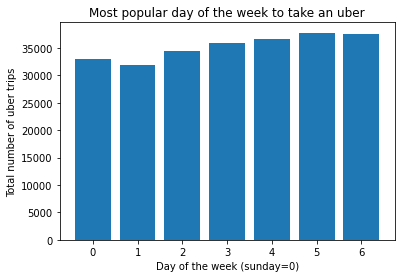

In [81]:
def plot_visual_7_1_most_popular_day_for_ubers():
    """
    Plot the a bar plot giving the total number of uber trips per day of week 
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
    """
    QUERY_2 = """
SELECT
    COUNT(pickup_datetime),
    strftime ('%w', pickup_datetime) weekday
FROM taxi_trips
GROUP BY strftime ('%w', pickup_datetime)
"""
    data=engine.execute(QUERY_2).fetchall()
    Total_uber_trips=[]
    Weekday=[]
    for elem in data:
        Total_uber_trips.append(elem[0])
        Weekday.append(elem[1])
    plt.bar(Weekday,Total_uber_trips)
    plt.title("Most popular day of the week to take an uber")
    plt.xlabel("Day of the week (sunday=0)")
    plt.ylabel("Total number of uber trips")
    plt.show()
    return

plot_visual_7_1_most_popular_day_for_ubers()

    

Question 2: Which month has the most total precipitation over the time period 2009 - 2015 ?

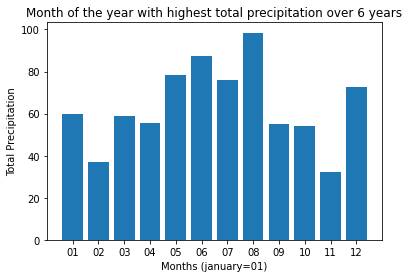

In [82]:
def Visual_7_2_Month_with_highest_precipitation():
    """
    Plot the a bar plot giving the total precipitation per day of week 
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
    """
    QUERY = """
SELECT
    strftime ('%m', Date) month,
    SUM(Precipitation)
FROM hourly_weather
GROUP BY strftime ('%m', Date)
"""
    data=engine.execute(QUERY).fetchall()
    Total_precipitation=[]
    Month=[]
    for elem in data:
        Month.append(elem[0])
        Total_precipitation.append(elem[1])
    plt.bar(Month,Total_precipitation)
    plt.title("Month of the year with highest total precipitation over 6 years")
    plt.xlabel("Months (january=01)")
    plt.ylabel("Total Precipitation")
    plt.show()
    return 
Visual_7_2_Month_with_highest_precipitation()

Question 3 : Which month in 2014 were the windiest, and how many hired trips were made during those months?

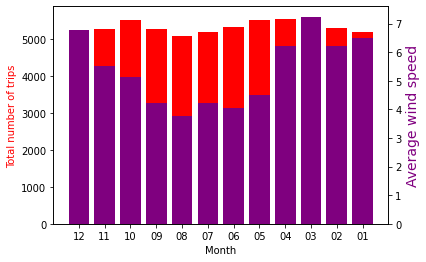

In [83]:
def Visual_7_3_windies_month_2014_and_trips():
    """
    Plot a double bar plot per month the total number of trips and the average wind speed
            Parameters:
                      None
            Returns:
                   Nothing, a graph will be displayed
    """
    QUERY = """
WITH trips AS (
    SELECT pickup_datetime FROM taxi_trips WHERE strftime ('%Y',pickup_datetime)=='2014' 
    UNION ALL 
    SELECT pickup_datetime FROM uber_trips WHERE strftime ('%Y',pickup_datetime)=='2014' )
SELECT strftime('%m', trips.pickup_datetime) month,
        COUNT(trips.pickup_datetime) total_trips,
        SUM(daily_weather.wind_speed) wind,
        COUNT(daily_weather.wind_speed) day_number
FROM trips JOIN daily_weather ON strftime('%Y-%m-%d',trips.pickup_datetime)=strftime('%Y-%m-%d',daily_weather.Date)
GROUP BY month
ORDER BY month DESC
"""
    data=engine.execute(QUERY).fetchall()
    Number_trips=[]
    Month=[]
    Average_wind_speed=[]
    for elem in data:
        Month.append(elem[0])
        Number_trips.append(elem[1])
        Average_wind_speed.append(elem[2]/elem[3])
    fig,ax = plt.subplots()
    ax.bar(Month,Number_trips, color="red")
    ax.set_xlabel("Month")
    ax.set_ylabel("Total number of trips",color="red")
    ax2=ax.twinx()
    ax2.bar(Month,Average_wind_speed,color="blue",alpha=0.5)
    ax2.set_ylabel("Average wind speed",color="purple",fontsize=14)
    plt.show()
    return

Visual_7_3_windies_month_2014_and_trips()